In [1]:
%run "~/Documents/Algebra1/tools/Numberlines.py"

In [2]:
current_lesson = '/home/osboxes/Documents/Algebra1/images/Unit_1/Lesson_4'

(<Figure size 1000x100 with 1 Axes>, <Axes: >)

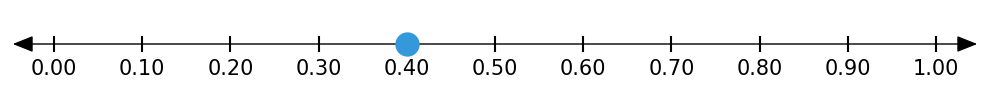

In [12]:
plot_number_line_with_points(
    line_range=(0, 1, 0.1),
    orientation='horizontal',
    figsize=10,
    title=None,
    points=[(0.4, True, '#3498DB')],
    #distances=[(-3, 0), (0, 3)],
    output=f'{current_lesson}/linechart_point_4.png',
    xtick_format=lambda x: f"{x:.2f}"
)


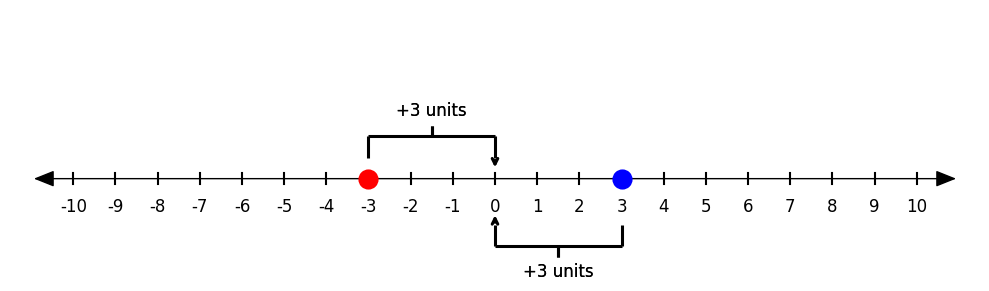

In [535]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=10,
    title=None,
    points=[(5, True, 'blue')],
    distances=[(-5, 0, "right"), (0, 3, "left")],
    output=f'{current_lesson}/absolute_value_five.png'
)


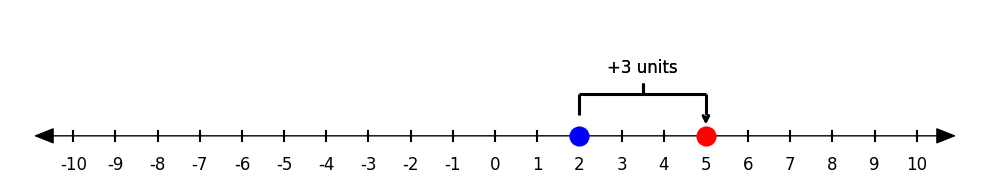

In [555]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=10,
    title=None,
    points=[(5, True, 'red'), (2, True, 'blue')],
    distances=[(2, 5, "right")],
    output=f'{current_lesson}/subtract_neg5_from_2.png'
)


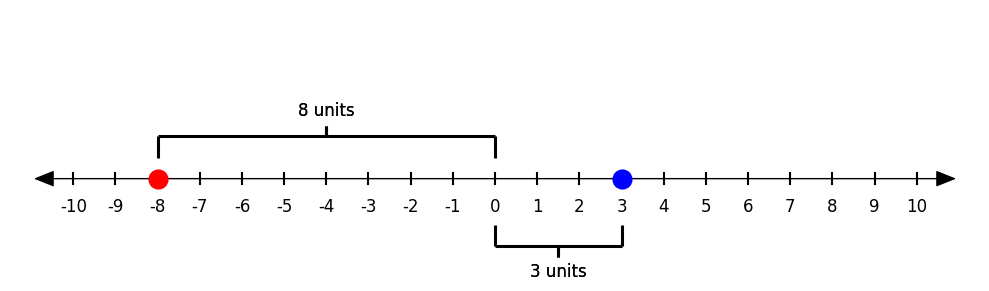

In [556]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=10,
    points=[(3, True, 'blue'), (-8, True, 'red')],
    distances=[(-8, 0), (0, 3)],
    output=f'{current_lesson}/compare_3_to_neg8.png'
)



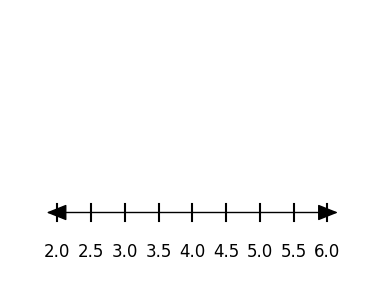

In [561]:
plot_number_line_with_points(
    line_range=(2, 6, 0.5),
    orientation='horizontal',
    figsize=10,
    #points=[(3, True, 'blue'), (-8, True, 'red')],
    #distances=[(-8, 0), (0, 3)],
    output=f'{current_lesson}/between_3_and_5_by_2.png'
)

